# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection

**1. Загрузить датасет**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import io
import requests
from scipy.stats import t
from scipy.stats import norm

%matplotlib inline

In [2]:
data=pd.read_csv('creditcard_sampledata.csv').iloc[:,1:]
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,0.169360,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,-0.715756,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,-0.372442,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
print("\n Ячейки с отсутствующими значениями: \n", data.isnull().sum().sum())


 Ячейки с отсутствующими значениями: 
 0


**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

Class
0    7983
1      17
Name: Class, dtype: int64


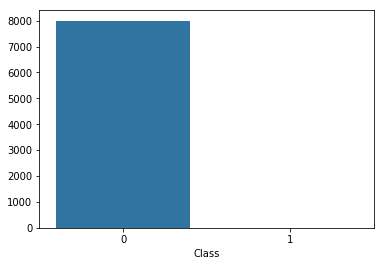

In [4]:
sns.barplot(data["Class"], data["Class"].count())
print(data.groupby('Class')['Class'].count())

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [5]:
print('суммы по обманным и нормальным операциям: \n', data[['Amount', 'Class']].groupby('Class').sum().reset_index())

суммы по обманным и нормальным операциям: 
    Class     Amount
0      0  716244.08
1      1    1109.89


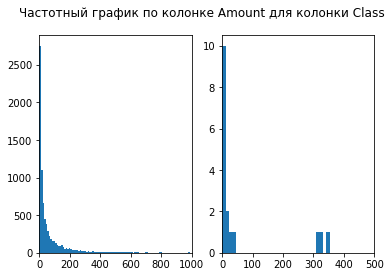

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim(left=0, right=1000)
ax2.set_xlim(left=0, right=500)
ax1.hist(data.query('Class  == 0')['Amount'], bins = 1000)
ax2.hist(data.query('Class  == 1')['Amount'], bins = 30)
fig.suptitle('Частотный график по колонке Amount для колонки Class')
plt.show()

**5. Построить графики histograms для всех значений**

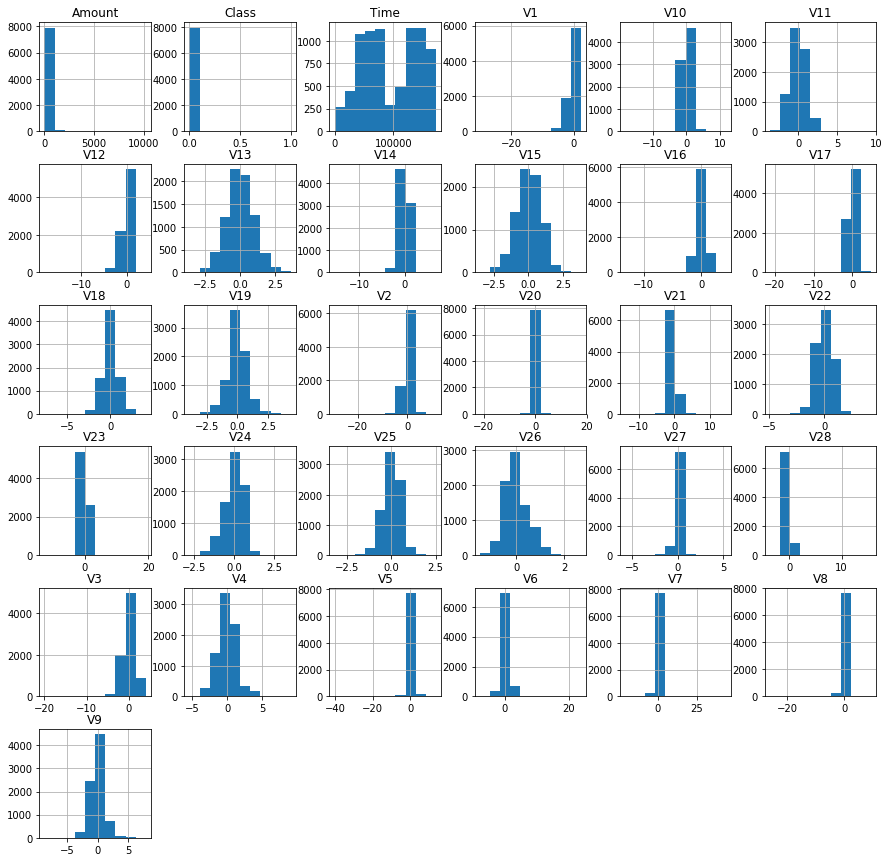

In [7]:
data.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

In [8]:
headers = list(data.columns.values)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.000000,0.928245,0.431868,0.567334,-0.212954,0.570282,-0.279725,-0.361905,0.510607,0.068316,...,-0.031350,-0.033056,-0.215096,0.197038,0.429942,-0.437884,0.044609,-0.616334,-0.993196,-1.0
1,-1.000000,0.812571,0.456759,0.837215,-0.292674,0.496075,-0.529799,-0.320564,0.453641,0.051021,...,-0.030549,0.022981,-0.200068,0.012442,-0.000402,-0.245625,0.024081,-0.627659,-0.989217,-1.0
2,-0.999305,0.921613,0.463404,0.737099,0.102355,0.480315,-0.534350,-0.346827,0.463979,-0.037822,...,-0.029238,-0.025675,-0.193827,0.054719,0.187006,-0.371103,0.040996,-0.615390,-0.998776,-1.0
3,-0.999259,0.929913,0.427757,0.679910,-0.380671,0.463107,-0.585570,-0.351413,0.456298,0.166115,...,-0.009312,0.180636,-0.214484,0.049067,0.369770,-0.576744,0.047565,-0.616962,-0.998274,-1.0
4,-0.999213,0.756116,0.519777,0.728346,-0.073970,0.482600,-0.507851,-0.345009,0.492254,0.003346,...,-0.016167,0.157891,-0.207612,-0.082538,0.101251,-0.422244,-0.045332,-0.635456,-0.998039,-1.0


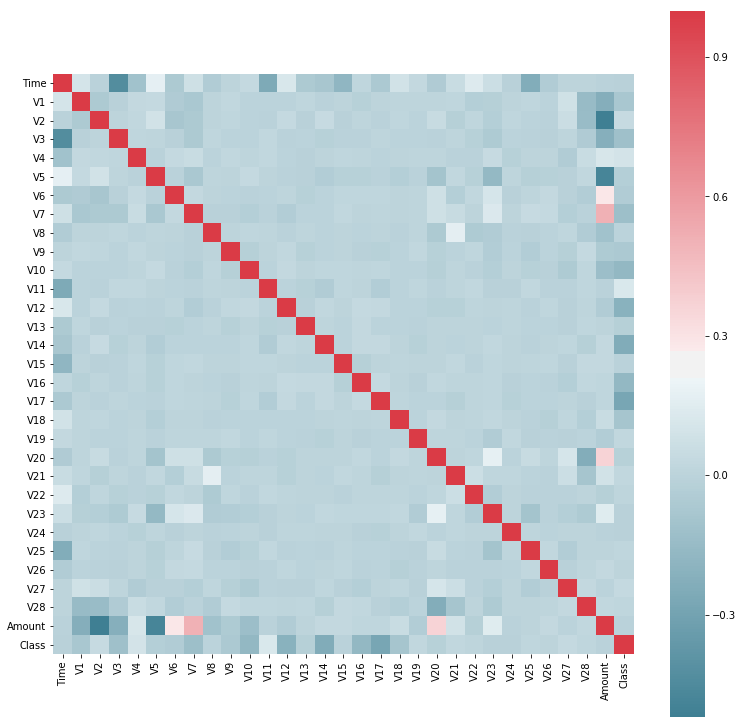

In [9]:
f, ax = plt.subplots(figsize=(13, 13))
corr = df_norm.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель логистической регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [20]:
#тестовая и обучающая выборка на всех строках df
from sklearn.model_selection import train_test_split

column_sels = ['V17', 'V14', 'V12', 'V10']
x = data.loc[:,column_sels]
v17 = x['V17']
v14 = x['V14']
v12 = x['V12']
v10 = x['V10']

y = data['Class']
x = np.vstack([np.array(v17), np.array(v14), np.array(v12), np.array(v10)]).T
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 0)

In [11]:
#линейная регрессия (было в исходном варианте дз, оставила)

from sklearn.linear_model import LinearRegression
model_linear = LinearRegression().fit(X_train, y_train)
print('intercept:', model_linear.intercept_)
print('slope:', model_linear.coef_)

model_linear.score(X_test, y_test)

intercept: 0.0017860449608705592
slope: [-0.01268008 -0.01016008 -0.00775712 -0.00588069]


0.28441950341506095

In [12]:
#логистическая регрессия (поправка к дз по лекции)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model_logistic = LogisticRegression().fit(X_train, y_train)
predicted_classes = model_logistic.predict(X_test)

print('Точность предсказания модели: ', accuracy_score(y_test,predicted_classes))
parameters = model_logistic.coef_

Точность предсказания модели:  0.996875


C:\Users\bns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Логистическая регрессия дала гораздо более качественную модель, чем линейная регрессия. 

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать логистическую регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [13]:
from imblearn.under_sampling import RandomUnderSampler

In [14]:
data.head()
Y = data["Class"].ravel() 
input_x = data.loc[:,column_sels]

In [15]:
#!pip install imblearn --user
ros = RandomUnderSampler(random_state=0)
X = input_x
ros.fit(X, Y)
X_resampled, y_resampled = ros.fit_sample(X, Y)
print('Количество элементов до операции:', len(X))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 8000
Количество элементов после операции: 34


In [16]:
y = y_resampled
x = np.vstack(X_resampled)
X_train_under,X_test_under,y_train_under,y_test_under = train_test_split(x,
                                                 y,
                                                 test_size = 0.2,#%70 train, 30% test
                                                 random_state = 0)

In [30]:
model_linear_under = LinearRegression().fit(X_train_under, y_train_under)
print('intercept:', model_linear_under.intercept_)
print('slope:', model_linear_under.coef_)

model_linear_under.score(X_test_under, y_test_under)

intercept: 0.25106896692594727
slope: [ 0.00840464 -0.07382553 -0.00423968 -0.0104272 ]


-0.25405075526929854

В данном случае получили плохую модель на линейной регрессии и интересно, что коэффициент получили с обратным знаком, чем по всем строкам df. Думаю это произошло из-за того, что в датасэте осталось только 34 значения, мало данных для построения модели.

In [28]:
#логистическая регрессия (поправка к дз по лекции)
#здесь обучаюсь на уменьшенной выборке, а тест смотрю по всему датасэту, чтобы сравнивать с предыдущими и последующими методами (так и предполагается?)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model_logistic_under = LogisticRegression().fit(X_train_under, y_train_under)
predicted_classes = model_logistic_under.predict(X_test)

print('Точность предсказания модели: ', accuracy_score(y_test,predicted_classes))
parameters = model_logistic_under.coef_

C:\Users\bns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Точность предсказания модели:  0.94125


На сокращенном датасэте получили модель хуже, чем на том же алгоритме логистической регрессии (0,94 vs 0,99), но с учетом того, что датасэт из 8000 строк стал 34 строки - это интересный результат.

**9. Написать модель RandomForestClassifier на данный датасэт и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии).**

No handles with labels found to put in legend.


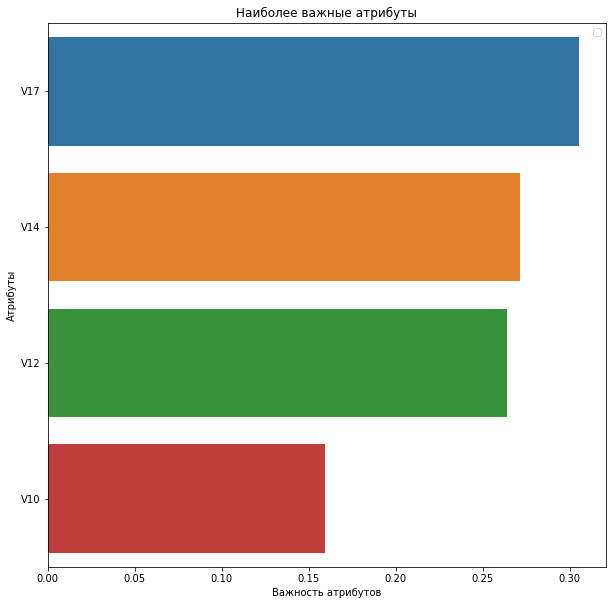

In [31]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
model_randomforest=RandomForestClassifier(n_estimators=100)

# обучаем модель
model_randomforest.fit(X_train,y_train)

feature_imp = pd.Series(model_randomforest.feature_importances_,index=column_sels).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [32]:
model_randomforest.score(X_test, y_test)

0.99625

Если сравнивать 3 алгоритма: линейную регрессий, логистическую и randomforest, хуже всего показала себя линейная регрессия, а 2 других алгоритма показали хорошее качество примерно одинакового уровня - 0.9968 vs 0.9962 (цифры совпадают до 3-х знаков после запятой), по четвертому знаку лучше отработала модель логистической регрессии.